<a href="https://colab.research.google.com/github/Rajdeep32-create/ads-purchased-or-not-/blob/main/%5BClustering%5D_Customer_Segmentation_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
up = files.upload()

Saving libraries_requirement.txt to libraries_requirement.txt


In [ ]:
import sys

print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
!pip install -r libraries_requirement.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/customer_segmentation_data.csv")
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [ ]:
df1 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [ ]:
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


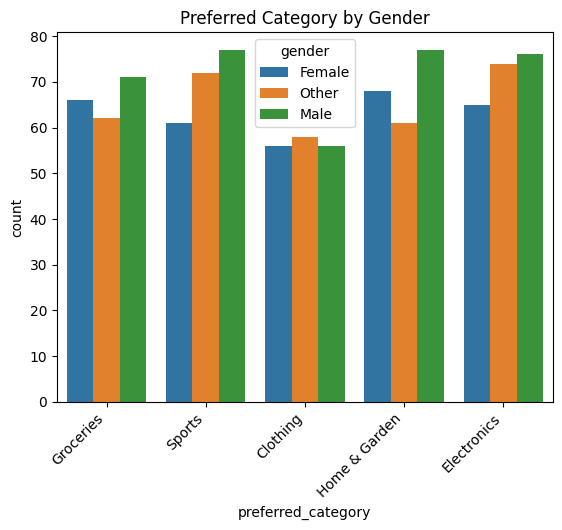

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for preferred category by gender
sns.countplot(x='preferred_category', hue='gender', data=df)
plt.title('Preferred Category by Gender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

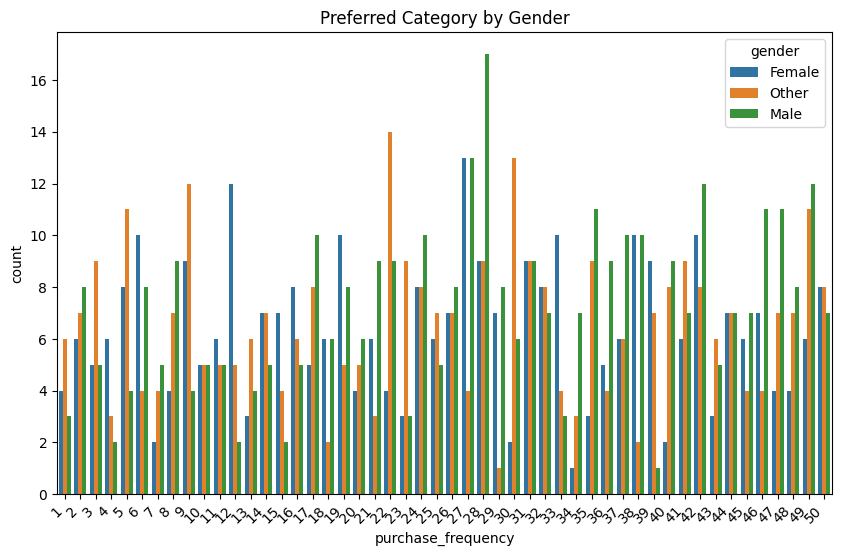

In [ ]:
# Bar plot for preferred category by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='purchase_frequency', hue='gender', data=df)
plt.title('Preferred Category by Gender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

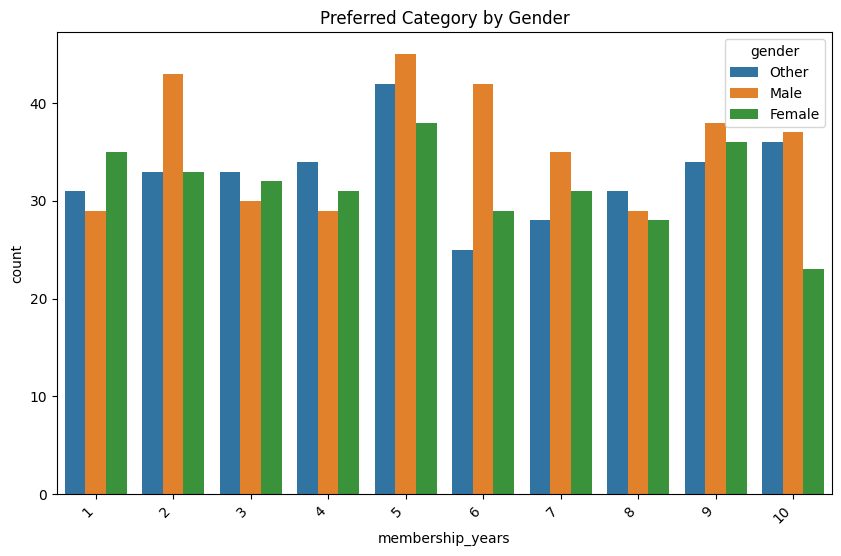

In [ ]:
# Bar plot for preferred category by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='membership_years', hue='gender', data=df)
plt.title('Preferred Category by Gender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

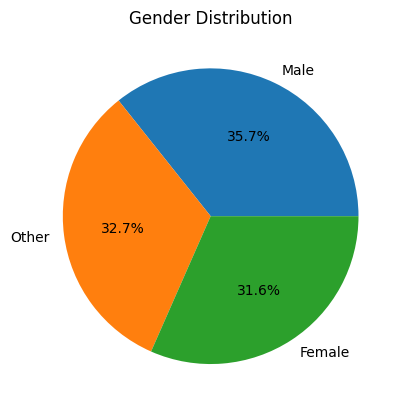

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for gender distribution
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

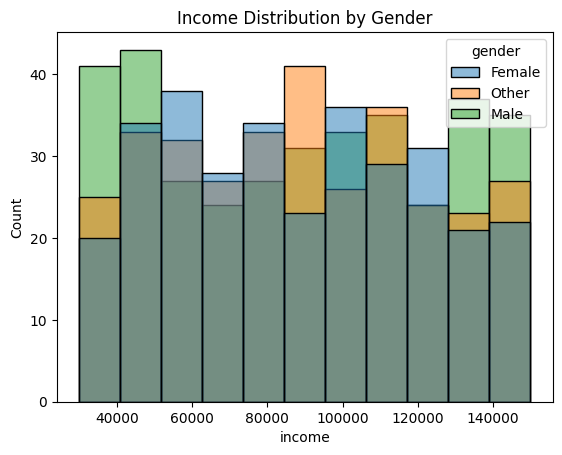

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for income by gender
sns.histplot(x='income', hue='gender', data=df)
plt.title('Income Distribution by Gender')
plt.show()

In [ ]:
df.shape

(1000, 9)

In [ ]:
# Check if the 'id' column exists in the DataFrame before dropping it.
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
else:
    print("Column 'id' not found in the DataFrame.")

In [ ]:
numerical_columns = pd.DataFrame(df.select_dtypes(include=np.number))
print(numerical_columns.head())
print(numerical_columns.columns)

   age  income  spending_score  membership_years  purchase_frequency  \
0   38   99342              90                 3                  24   
1   21   78852              60                 2                  42   
2   60  126573              30                 2                  28   
3   40   47099              74                 9                   5   
4   65  140621              21                 3                  25   

   last_purchase_amount  
0                113.53  
1                 41.93  
2                424.36  
3                991.93  
4                347.08  
Index(['age', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'last_purchase_amount'],
      dtype='object')


age


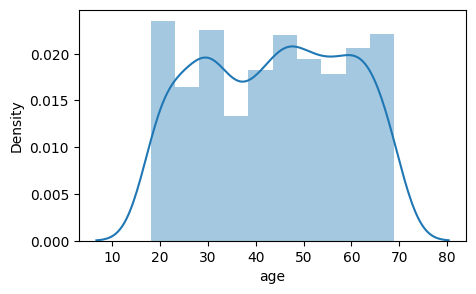

income


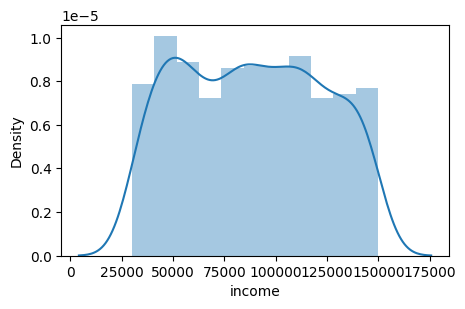

spending_score


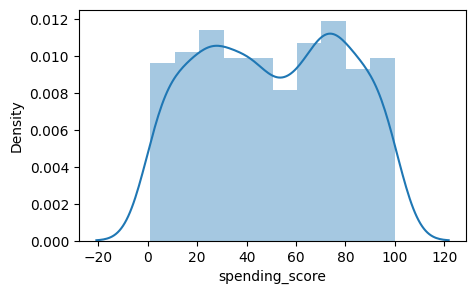

membership_years


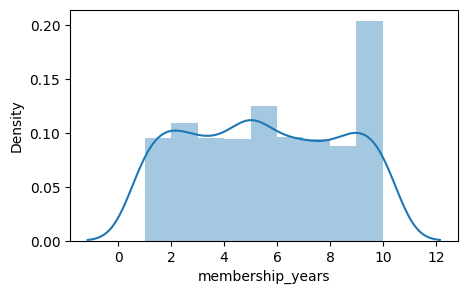

purchase_frequency


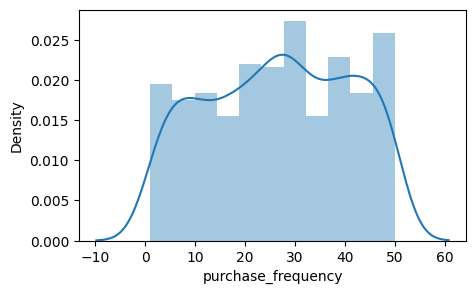

last_purchase_amount


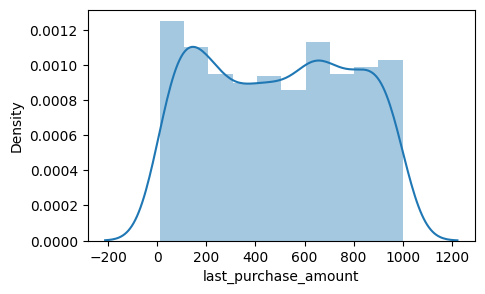

In [ ]:
for i in numerical_columns.columns:
  print(i)
  plt.figure(figsize=(5,3))
  sns.distplot(df[i])
  plt.show()

age


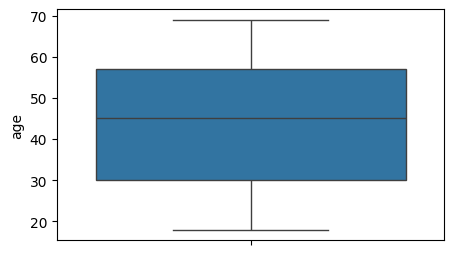

income


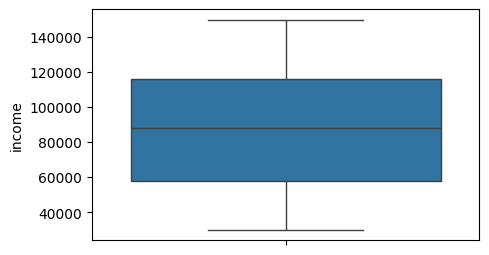

spending_score


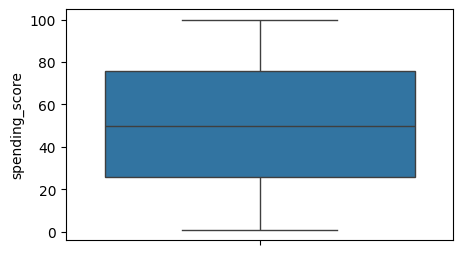

membership_years


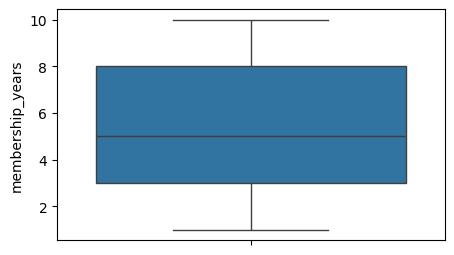

purchase_frequency


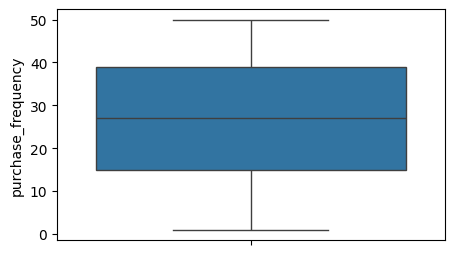

last_purchase_amount


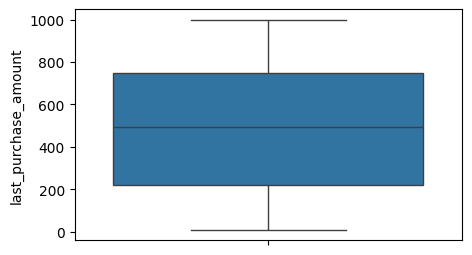

In [ ]:
for i in numerical_columns.columns:
  print(i)
  plt.figure(figsize=(5,3))
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1000, 8)

In [ ]:
# df = df1.copy()

In [ ]:
df.gender.unique()

array(['Female', 'Other', 'Male'], dtype=object)

In [ ]:
# Convert categorical variables to numerical using one-hot encoding without dropping first category
# df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to 'gender'
df['gender_encoded'] = le.fit_transform(df['gender']) # Remove inplace=True

In [ ]:
df.preferred_category.unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

In [ ]:
# Convert categorical variables to numerical using one-hot encoding without dropping first category
# df = pd.get_dummies(df, columns=['preferred_category'], drop_first=True)

In [ ]:
# Apply label encoding to 'preferred_category'
df['preferred_category_encoded'] = le.fit_transform(df['preferred_category'])

In [ ]:
df.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_encoded,preferred_category_encoded
0,-0.384644,0.316868,1.358468,3,24,-1.281540,0,2
1,-1.515362,-0.282016,0.321865,2,42,-1.523763,0,4
2,1.078639,1.112778,-0.714738,2,28,-0.230005,0,0
3,-0.251618,-1.210096,0.805613,9,5,1.690080,2,3
4,1.411203,1.523374,-1.025718,3,25,-0.491443,0,1


In [ ]:
df.purchase_frequency.unique()

array([24, 42, 28,  5, 25, 30, 43, 27,  7,  2, 49,  3,  8, 26, 13, 31, 21,
       17,  4, 47, 16,  9, 39,  1, 20, 18, 37, 48,  6, 38, 50, 29, 41, 34,
       45, 10, 35, 36, 19, 14, 40, 15, 11, 32, 44, 46, 23, 12, 22, 33])

In [ ]:
df.drop(['gender','preferred_category'],axis=1,inplace=True)

In [ ]:
df.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_encoded,preferred_category_encoded
0,-0.384644,0.316868,1.358468,3,24,-1.281540,0,2
1,-1.515362,-0.282016,0.321865,2,42,-1.523763,0,4
2,1.078639,1.112778,-0.714738,2,28,-0.230005,0,0
3,-0.251618,-1.210096,0.805613,9,5,1.690080,2,3
4,1.411203,1.523374,-1.025718,3,25,-0.491443,0,1


In [ ]:
# Scale numerical features for better clustering performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_features = ['age', 'income', 'spending_score','last_purchase_amount']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

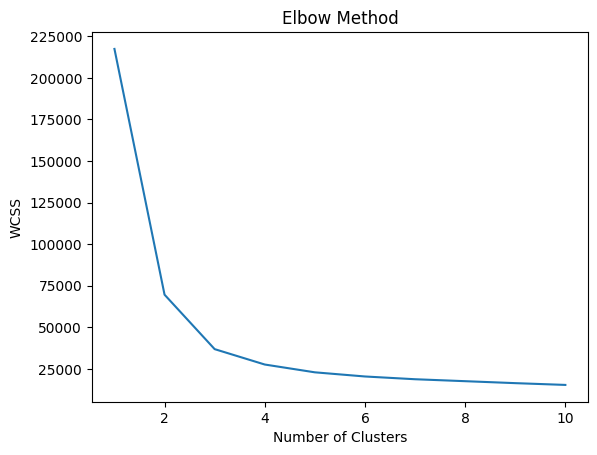

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)  # Fit KMeans to the data
    wcss.append(kmeans.inertia_)  # Append inertia to the list

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Choose the optimal number of clusters based on the elbow point in the graph
# Let's say the elbow point is at k = 3
k = 3

# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=k,random_state=42)
df['cluster'] = kmeans.fit_predict(df)

Cluster 0:
              age      income  spending_score  membership_years  \
count  358.000000  358.000000      358.000000        358.000000   
mean    -0.017708    0.030766        0.022853          5.455307   
std      1.013848    1.028127        0.979525          2.800953   
min     -1.714901   -1.707704       -1.716787          1.000000   
25%     -0.916747   -0.871225       -0.809759          3.000000   
50%      0.014433   -0.006161        0.114545          5.000000   
75%      0.879100    0.902124        0.866082          8.000000   
max      1.677254    1.796716        1.704002         10.000000   

       purchase_frequency  last_purchase_amount  gender_encoded  \
count          358.000000            358.000000      358.000000   
mean            26.100559              0.070971        0.994413   
std              4.549257              0.978040        0.792098   
min             18.000000             -1.628365        0.000000   
25%             22.000000             -0.804725   

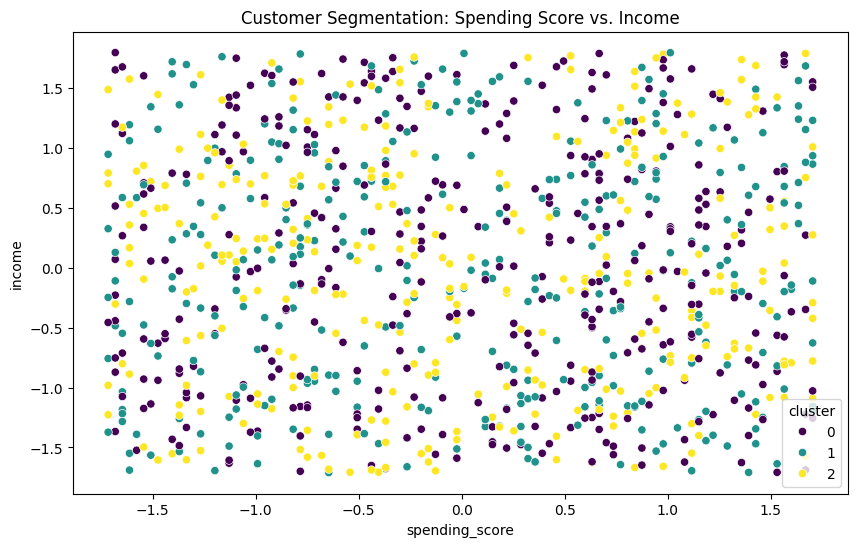

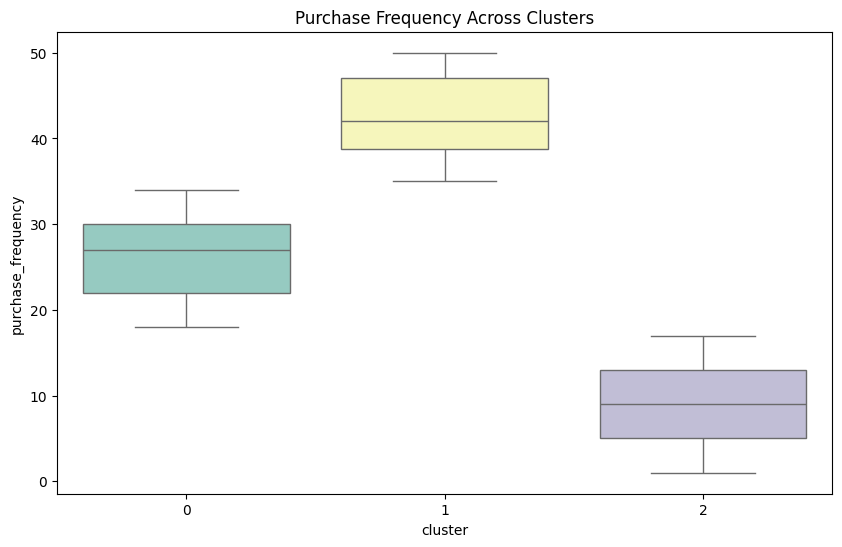

In [ ]:
# Analyze the characteristics of each cluster
for cluster in range(k):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster].describe())  # Descriptive statistics for each cluster

# Visualize clusters using scatter plots (example with 'spending_score' and 'income')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='spending_score', y='income', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segmentation: Spending Score vs. Income')
plt.show()

# Visualize clusters using box plots (example with 'purchase_frequency' and 'cluster')
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='purchase_frequency', data=df, palette='Set3')
plt.title('Purchase Frequency Across Clusters')
plt.show()

# ---

# Presentation of Findings
# ---
# Summarize key insights about each cluster based on their characteristics
# Discuss potential marketing strategies tailored to each segment
# Create visualizations (e.g., bar charts, heatmaps) to further illustrate findings
# ---

# Example insights:
# - Cluster 0: High spending score, high income - Target with premium products/services
# - Cluster 1: Low spending score, low income - Focus on value-driven offerings
# - Cluster 2: ... (and so on)

In [ ]:
# from sklearn.metrics import silhouette_score

# # Assuming you have your data in 'df' and cluster assignments in 'df['cluster']'
# silhouette_avg = silhouette_score(df.drop('cluster', axis=1), df['cluster'])

# print(f"Silhouette Score: {silhouette_avg}")

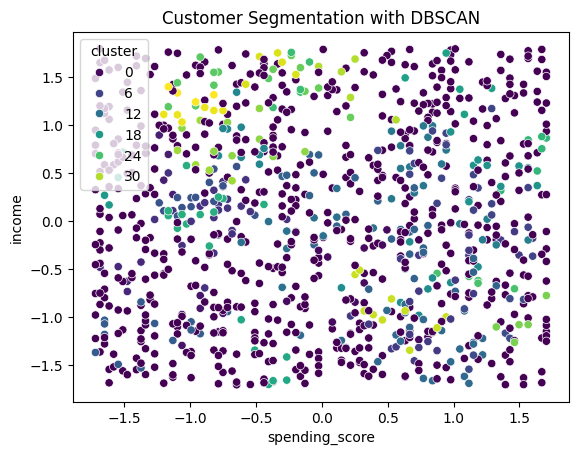

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score # Import silhouette_score

# ... (your previous code for data loading, preprocessing, etc.) ...

# Scale numerical features (important for DBSCAN)
numerical_features = ['age', 'income', 'spending_score', 'last_purchase_amount']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
df['cluster'] = dbscan.fit_predict(df[numerical_features])

# Visualize clusters (example)
sns.scatterplot(x='spending_score', y='income', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segmentation with DBSCAN')
plt.show()

# Calculate and print Silhouette Score
# Filter out noise points (cluster -1) for Silhouette Score calculation
df_filtered = df[df['cluster'] != -1]
silhouette_avg = silhouette_score(df_filtered[numerical_features], df_filtered['cluster'])

# print(f"Silhouette Score: {silhouette_avg}")

# Analyze clusters (similar to K-Means analysis)
# ...

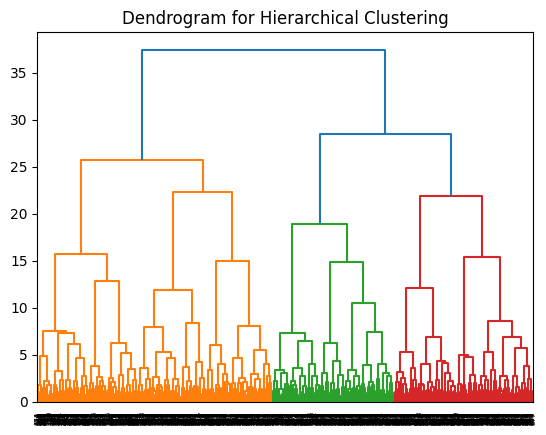

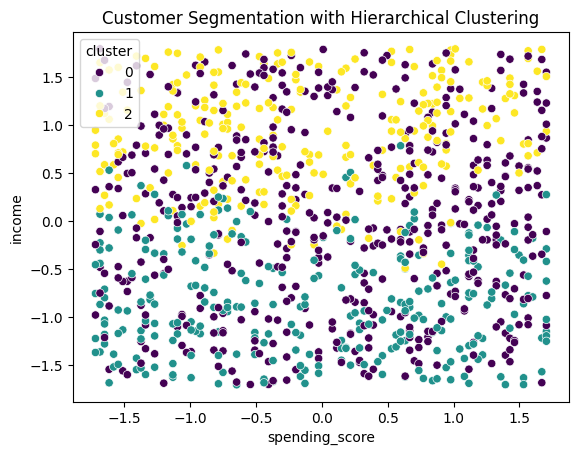

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score  # Import silhouette_score

# ... (your previous code for data loading, preprocessing, etc.) ...

# Scale numerical features
numerical_features = ['age', 'income', 'spending_score', 'last_purchase_amount']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Apply hierarchical clustering
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Adjust parameters
df['cluster'] = agglomerative.fit_predict(df[numerical_features])

# Visualize dendrogram
dendrogram = sch.dendrogram(sch.linkage(df[numerical_features], method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Visualize clusters (example)
sns.scatterplot(x='spending_score', y='income', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segmentation with Hierarchical Clustering')
plt.show()

# Calculate and print Silhouette Score
# silhouette_avg = silhouette_score(df[numerical_features], df['cluster'])
# print(f"Silhouette Score: {silhouette_avg}")

# Analyze clusters (similar to K-Means analysis)
# ...